# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [189]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [190]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/Project/MIDS/datasets/mnist-original')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

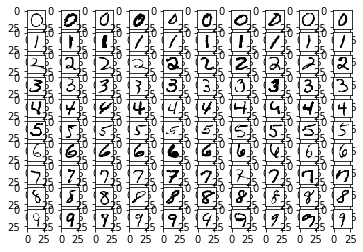

In [387]:
def P1(num_examples=10):
### STUDENT START ###
  
  # Initialize variables  
  fig = plt.figure()
  ax ={}  
  digit_index = {}

  # Create a dictionary, digit_index[i] where each i
  # represents a number 0-9 which is mapped to a list.
  # This list will contain the position in dev_data
  # labeled with that number so we can display the
  # digits in order
  for i in range(0,10):
    find_count = 0
    index = 1
    digit_list = []
    while find_count < num_examples:
        if (dev_labels[index] == i):
            digit_list.append(index)
            find_count += 1
        index += 1
    digit_index[i] = digit_list

  plot_index = 1
  # Loop through all digit_index and display the digit in
  # dev_data at that location
  for d in sorted(digit_index.keys()):
        #Loop through displaying examples
        
        for i in digit_index[d]:
            ax[plot_index] = fig.add_subplot(10, num_examples, plot_index)
            ax[plot_index].imshow(dev_data[i].reshape(28,28), cmap="Greys")
            plot_index += 1
            #plot_index += 1
  
  # Show the digit images
  plt.show()
    

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [169]:
def P2(k_values):

### STUDENT START ###

  # Create a dictionary to keep predictions
  pred = {}

  # Create and fit a model using kNN using one of the
  # passed values of k. Store in the dictionary pred.
  for i in k_values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(mini_train_data, mini_train_labels)
    pred[i] = model.predict(dev_data)
    
  # Following instructions, display metrics for each digit
  # when k = 1
  print(classification_report(dev_labels, pred[1]))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: 9 is the most difficult digit with a precision of .78, a recall of .82 and f1-score of .80.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [388]:
def P3(train_sizes, accuracies):
    from sklearn.metrics import accuracy_score


### STUDENT START ###
    pred = {} 
    
    # For each of the training sizes, train a kNN model with k=1 and
    # store the accuracies and print out prediction time
    for sz in train_sizes:
        x_train = train_data[:sz]
        x_train_labels = train_labels[:sz]
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(x_train, x_train_labels)
        
        # Mark time when prediction started
        start_time = time.time()
        
        pred[sz] = model.predict(dev_data)
        
        # Compute total time for prediction for specific size
        total_time = time.time() - start_time
        
        # Add accuracy score to accuracy list
        accuracies.append(accuracy_score(dev_labels, pred[sz]))
        
        # Print out results
        print("\n\n Training Size: ", sz)
        print("-----------------------")
        print("Prediction time: ", total_time)
        print("Accuracy: ", accuracy_score(dev_labels, pred[sz]))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)




 Training Size:  100
-----------------------
Prediction time:  0.12471985816955566
Accuracy:  0.72


 Training Size:  200
-----------------------
Prediction time:  0.23504400253295898
Accuracy:  0.786


 Training Size:  400
-----------------------
Prediction time:  0.44777798652648926
Accuracy:  0.841


 Training Size:  800
-----------------------
Prediction time:  0.9398059844970703
Accuracy:  0.884


 Training Size:  1600
-----------------------
Prediction time:  1.8782808780670166
Accuracy:  0.902


 Training Size:  3200
-----------------------
Prediction time:  3.7743520736694336
Accuracy:  0.926


 Training Size:  6400
-----------------------
Prediction time:  7.556456089019775
Accuracy:  0.937


 Training Size:  12800
-----------------------
Prediction time:  14.78904104232788
Accuracy:  0.959


 Training Size:  25000
-----------------------
Prediction time:  27.96720314025879
Accuracy:  0.97


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [337]:
def P4():

### STUDENT START ###
    from sklearn.metrics import accuracy_score
    
    reg = LinearRegression()
    reg.fit(np.asarray(train_sizes).reshape(-1,1), np.asarray(accuracies))

    pred = reg.predict(60000)
    
    print("Prediction for n=60000: ", pred)


### STUDENT END ###

P4()

Prediction for n=60000:  [ 1.24307226]


ANSWER: Using linear regression is producing a incorrect accuracy prediction, 1.243 which is above 1.0. Since it is fitting a line, it is taking the progression of that line and going about 1.0 (since 25000 is already at .97).

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [386]:
def P5():


### STUDENT START ###
    from sklearn.metrics import accuracy_score


    # Fit a model using KNN with k=1
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data, train_labels)

    # Use model to predict using dev data
    pred = model.predict(dev_data)
    
    print("Accuracy score: ", accuracy_score(dev_labels, pred), "\n")

    # display confusion matrix
    print("Confusion Matrix")
    print("--------------------------------")
    print(confusion_matrix(dev_labels, pred))
    print("\n\n")

    # Display a few examples of wrong predictions
    mistakes = []
    i = 0

    # Loop through predictions and find a couple of examples
    while len(mistakes) < 10:
        if dev_labels[i] != pred[i]:
            mistakes.append(i)
        i += 1

    # Display examples of incorrect predictions
    print ("Examples of prediction mistakes")
    print ("-------------------------------")
    for i in mistakes:
        print("True Label:", dev_labels[i], "Predicted Label:", pred[i])
    
### STUDENT END ###

P5()

Accuracy score:  0.977 

Confusion Matrix
--------------------------------
[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]



Examples of prediction mistakes
-------------------------------
True Label: 6.0 Predicted Label: 4.0
True Label: 7.0 Predicted Label: 2.0
True Label: 8.0 Predicted Label: 3.0
True Label: 3.0 Predicted Label: 8.0
True Label: 8.0 Predicted Label: 6.0
True Label: 8.0 Predicted Label: 5.0
True Label: 3.0 Predicted Label: 5.0
True Label: 5.0 Predicted Label: 0.0
True Label: 8.0 Predicted Label: 3.0
True Label: 4.0 Predicted Label: 9.0


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [385]:
def P6():
    
### STUDENT START ###
    # Bring in scipy for the filters
    from scipy.ndimage.filters import gaussian_filter
    from sklearn.metrics import accuracy_score

    # Model using kNN
    model = KNeighborsClassifier(n_neighbors=1)

    # Preprocess the training data and output accuracy score
    train_data_blurred = gaussian_filter(train_data, sigma=1)
    model.fit(train_data_blurred, train_labels)

    pred = model.predict(dev_data)

    print ("Accuracy Score Blurred Train: ", accuracy_score(dev_labels, pred))

    # Preprocess dev data but not training data, output accuracy score
    dev_data_blurred = gaussian_filter(dev_data, sigma=1)
    model.fit(train_data, train_labels)

    pred = model.predict(dev_data_blurred)

    print ("Accuracy Score Blurred Dev: ", accuracy_score(dev_labels, pred))

    # Preprocess both training and test, output accuracy score
    train_data_blurred = gaussian_filter(train_data, sigma=1)
    dev_data_blurred = gaussian_filter(dev_data, sigma=1)

    model.fit(train_data_blurred, train_labels)

    pred = model.predict(dev_data_blurred)

    print ("Accuracy Score Blurred Train and Dev: ", accuracy_score(dev_labels, pred))


### STUDENT END ###

P6()

Accuracy Score Blurred Train:  0.882
Accuracy Score Blurred Dev:  0.659
Accuracy Score Blurred Train and Dev:  0.61


ANSWER: The blurring appeared to decrease the overall accuracy using kNN with:

* .882 accuracy when blurring the training data only
* .659 accuracy when blurring the dev data only
* .61 accuracy when blurring both the dev and the training data

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [389]:
def P7():

### STUDENT START ###
    from sklearn.metrics import accuracy_score

    # Using Bernoulli, fit model and output accuracy
    b_model = BernoulliNB(binarize=.5)
    b_model.fit (train_data, train_labels)

    b_pred = b_model.predict(dev_data)

    print ("Accuracy Score Bernoulli: ", accuracy_score(dev_labels, b_pred))

    # Using Multinomial, fit model and output accuracy
    m_model = MultinomialNB();
    m_model.fit(train_data, train_labels)

    m_pred = m_model.predict(dev_data)

    print ("Accuracy Score Multinomial: ", accuracy_score(dev_labels, m_pred))

    
### STUDENT END ###

P7()

Accuracy Score Bernoulli:  0.845
Accuracy Score Multinomial:  0.826


ANSWER: The multi-class version does not improve the results, as the accuracy of the Bernoulli is .845 while the multinomial is just .826. This might be expected, as the Bernoulli works with binary (0,1) while the multinomial works with 3 - less values are simpler and therefore aids accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [391]:
def P8(alphas):

### STUDENT START ###

  # Do a search for best parameters
  # Note: Some warnings come up
  grid = GridSearchCV(estimator=BernoulliNB(), param_grid=alphas)
  grid.fit(train_data, train_labels)  

  # Print out parameter values found
  print("Best Score: ", grid.best_score_)
  print("Best Parameter: ", grid.best_params_)
  print("All Grid Scores: ", grid.grid_scores_)
  
  return grid


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best Score:  0.8334666666666667
Best Parameter:  {'alpha': 0.0}
All Grid Scores:  [mean: 0.83347, std: 0.00253, params: {'alpha': 0.0}, mean: 0.83327, std: 0.00258, params: {'alpha': 0.0001}, mean: 0.83317, std: 0.00254, params: {'alpha': 0.001}, mean: 0.83300, std: 0.00259, params: {'alpha': 0.01}, mean: 0.83267, std: 0.00253, params: {'alpha': 0.1}, mean: 0.83225, std: 0.00249, params: {'alpha': 0.5}, mean: 0.83200, std: 0.00245, params: {'alpha': 1.0}, mean: 0.83160, std: 0.00249, params: {'alpha': 2.0}, mean: 0.82987, std: 0.00250, params: {'alpha': 10.0}]


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


ANSWER: Best value for alpha is 0.0 which is expected since there is no smoothing here. It however, makes it harder to generalize.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [392]:
def P9():

### STUDENT END ###
    # Fit and model using GaussianNB without doing any parameter tweaks
    g_model = GaussianNB();
    g_model.fit(train_data, train_labels)

    g_pred = g_model.predict(dev_data)

    print ("Accuracy Score Gaussian: ", accuracy_score(dev_labels, g_pred))

    
    #Fit and model using GaussianNB while tweaking theta and sigma parameters (Values were
    # found manually through trial and error)
    g_model = GaussianNB()
    g_model.fit(train_data, train_labels)
    
    g_model.theta_ = g_model.theta_*2.15
    g_model.sigma_ = g_model.sigma_*.28

    g_pred = g_model.predict(dev_data)

    print ("Accuracy Score Gaussian after parameter tweaks: ", accuracy_score(dev_labels, g_pred))

### STUDENT END ###

gnb = P9()

Accuracy Score Gaussian:  0.571
Accuracy Score Gaussian after parameter tweaks:  0.787


ANSWER: Tweaking the theta and sigma parameters increases accuracy from .571 to .787.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

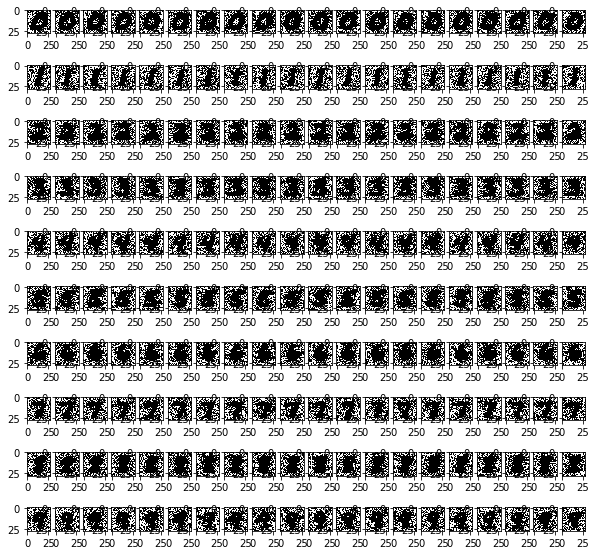

In [394]:
def P10(num_examples):

### STUDENT START ###
    # Fit and train model using BernoulliNB and get probabilities
    model = BernoulliNB()
    model.fit(train_data, train_labels)
    
    model_prob = np.exp(model.feature_log_prob_)

    # Initialize plot object and other variables
    fig = plt.figure(figsize=(10, 10))
    index = 1
    ax = {}

    # Added as suggestion on channel to introduce noise
    for i in range(0, 10):
        for j in range(0, num_examples):
            y=[0 if z<.5 else 1 for z in np.exp(model.feature_log_prob_[i])+np.random.rand(28*28)]
            
            # Add subplot and display image
            ax[index] = fig.add_subplot(10, num_examples, index)
            ax[index].imshow(np.asarray(y).reshape(28, 28), cmap="Greys")
            if index < 200:
                index += 1                
        

    plt.show()
    

### STUDENT END ###

P10(20)

ANSWER: The generated digits appear more standard than the training digits with less differences.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [368]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Train and fit a Bernoulli model
    model = BernoulliNB(alpha=.1, binarize=.5)
    model.fit(train_data, train_labels)

    pred = model.predict(dev_data)
    
    # Get prediction probabilities
    pred_p = nb.predict_proba(dev_data)
    
    # Bucket totals and # of correct predictions based on probabilities
    for i in range(1, len(pred)):
        post = max(pred_p[i])
        for j in range(1, len(buckets)):
            if post <= buckets[j]:
                total[j] += 1
                if pred[i] == dev_labels[i]:
                    correct[j] += 1
                break
            

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

[0, 42, 70, 51, 53, 49, 52, 53, 629]
[0, 19, 41, 27, 40, 27, 41, 45, 607]
p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  42    accuracy = 0.452
p(pred) <= 0.9990000000000    total =  70    accuracy = 0.586
p(pred) <= 0.9999900000000    total =  51    accuracy = 0.529
p(pred) <= 0.9999999000000    total =  53    accuracy = 0.755
p(pred) <= 0.9999999990000    total =  49    accuracy = 0.551
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.788
p(pred) <= 0.9999999999999    total =  53    accuracy = 0.849
p(pred) <= 1.0000000000000    total = 629    accuracy = 0.965


ANSWER: The classifier is not strongly calibrated since posterior and the accuracy is not approximately equal however, there is correlation. With the exception of two buckets (0.9999999990000 and 0.9999900000000), accuracy increases as the posterior increases. Computing Pearson (where total > 0), gives us .894 which shows the good correlation between posterior and accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()